# Practica APA

### Andrés Emch, Miquel Gotanegra

## Conjunto de datos y su fuente

Hemos escogido un conjunto de datos sobre las estadísticas de todos los jugadores de la NBA en las temporadas entre los años 1998 y 2022 a pesar de que trabajaremos únicamente con la última temporada 2021-2022. La fuente de nuestro dataset es el siguiente: https://data.world/etocco/nba-player-stats.

El objetivo de nuestro predictor seria predecir la posición en la que juega (base, escolta, alero, ala-pívot y pívot) un determina jugador a partir de sus estadísticas (clasificación). Por lo tanto, se trataría de un problema de clasificación.

Hay variedad de tipología en el conjunto de datos, pero nos centraremos en datos contínuos y no tanto en variables categóricas, a pesar de que planteemos un problema de clasificación. Los atributos de nuestro dataset serán los siguientes:

  - Age: Edad
  - G: Partidos jugados en la temporada
  - GS: Partidos jugados formando parte del quinteto inicial
  - MP: Minutos jugados por partido
  - FG: Tiros por partido
  - FGA: Intentos de tiro por partido
  - 3P: Triples por partido
  - 3PA: Intentos de triple por partido
  - 2P: Tiros de dos por partido
  - 2PA: Intentos de tiros de dos por partido
  - FT: Tiros libres por partido
  - FTA: Intentos de tiros libres por partido
  - ORB: Rebotes ofensivos por partido
  - DRB: Rebotes defensivos por partido
  - AST: Asistencias por partido
  - STL: Robos por partido
  - BLK: Tapones por partido
  - TOV: Pérdidas por partido
  - PF: Faltas personales por partido
  - PTS: Puntos por partido



## Visualización de las variables


In [299]:
# Uncomment to upgrade packages
# !pip install pandas --user --upgrade --quiet
# !pip install numpy==1.23.5 --user --upgrade --quiet
# !pip install scipy --user --upgrade --quiet
# !pip install statsmodels --user --upgrade --quiet
# !pip install seaborn --user --upgrade --quiet
# !pip install matplotlib --user --upgrade --quiet
# !pip install scikit-learn --user --upgrade 
# !pip install imblearn --upgrade --user --quiet
# !pip install scikit-optimize --user --quiet
# !pip install dtreeviz==1.4.1 --user --upgrade  --quiet
# !pip install yellowbrick --upgrade --user --quiet
# !pip install apafib --upgrade --user --quiet
# !pip install eli5 --upgrade --user --quiet

In [300]:
import pandas as pd
from pandas import read_csv

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn import set_config

from sklearn.metrics import  ConfusionMatrixDisplay,\
                  classification_report,  RocCurveDisplay, PrecisionRecallDisplay,\
                     f1_score, make_scorer, accuracy_score, roc_auc_score

from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier,ExtraTreesClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB, GaussianNB, CategoricalNB, MultinomialNB
from sklearn.ensemble import StackingClassifier, VotingClassifier

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.model_selection import GridSearchCV
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier.rocauc import roc_auc
from skopt import BayesSearchCV
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import  RandomOverSampler, SMOTE
from imblearn.pipeline import make_pipeline, Pipeline

import eli5
from dtreeviz.trees import dtreeviz

import warnings
from apafib import load_attrition
import skopt

set_config(display='text')
warnings.filterwarnings('ignore')
plt.rcParams.update({'font.size': 16})
pd.set_option('display.precision', 3)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"
from IPython.display import display, HTML
show_html = lambda html: display(HTML(html))

from collections import Counter

In [301]:
def save_results(clf, X_test, y_test, nclf, df):
    df.loc[nclf,'test acc'] = accuracy_score(y_test, clf.predict(X_test))
    df.loc[nclf,'precision score (W)'] = precision_score(y_test, clf.predict(X_test), average='weighted')
    df.loc[nclf,'recall score (W)'] = recall_score(y_test, clf.predict(X_test), average='weighted')
    df.loc[nclf,'f1 score (W)'] = f1_score(y_test, clf.predict(X_test), average='weighted')
    return df

results_df = pd.DataFrame()

niter = 15
cv = 5

In [302]:
# from google.colab import drive
# drive.mount('/content/drive')

In [303]:
import pandas as pd

# df = pd.read_csv('https://download.data.world/s/e7ae526mmlubwppc4o7o2aov343rh4')
#url = 'https://drive.google.com/file/d/1ug9VUKnxh59bLEIicLVUbG5mO4sAphgq/view?usp=share_link'
#path = 'https://drive.google.com/uc?id=' + url.split('/')[-2]

df = pd.read_csv('https://raw.githubusercontent.com/andresemch/APA-FIB/main/NBA_Player_Stats.csv?token=GHSAT0AAAAAAB44OEFNTZL2PXKOKZONLJ32Y5ZOSWA')

stats_data = df[df['Year'].isin(['2020-2021','2021-2022'])]
# stats_data = df
stats_data.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
13074,1,Precious Achiuwa,PF,21,MIA,61,4,12.1,2.0,3.7,...,1.2,2.2,3.4,0.5,0.3,0.5,0.7,1.5,5.0,2020-2021
13075,2,Jaylen Adams,PG,24,MIL,7,0,2.6,0.1,1.1,...,0.0,0.4,0.4,0.3,0.0,0.0,0.0,0.1,0.3,2020-2021
13076,3,Steven Adams,C,27,NOP,58,58,27.7,3.3,5.3,...,3.7,5.2,8.9,1.9,0.9,0.7,1.3,1.9,7.6,2020-2021
13077,4,Bam Adebayo,C,23,MIA,64,64,33.5,7.1,12.5,...,2.2,6.7,9.0,5.4,1.2,1.0,2.6,2.3,18.7,2020-2021
13078,5,LaMarcus Aldridge,C,35,TOT,26,23,25.9,5.4,11.4,...,0.7,3.8,4.5,1.9,0.4,1.1,1.0,1.8,13.5,2020-2021


### Selección de características


De todo el conjunto de características hay algunas que creemos que no nos van a ser relevantes, como el equipo, el ranking del jugador (orden alfabético) o su nombre. También vamos a eliminar todas las estadísticas que se puedan derivar de otras columnas, como el porcentaje de tiro o de rebotes.

Además, como hemos escogido usar solo dos temporadas consecutivas, vamos a eliminar la variable Year, ya que no nos aporta prácticamente nada de información 

In [304]:
# stats_data = stats_data.drop(columns=['Tm','Rk','Player','FG%','3P%','2P%','eFG%','FT%','TRB'])
stats_data = stats_data.drop(columns=['Tm','Rk','Player','FG%','3P%','2P%','eFG%','FT%','TRB','Year'])
# stats_data['Pos'] = stats_data['Pos'].astype('category').cat.codes
stats_data.head()

,Pos,Age,G,GS,MP,FG,FGA,3P,3PA,2P,...,FT,FTA,ORB,DRB,AST,STL,BLK,TOV,PF,PTS
13074,PF,21,61,4,12.1,2.0,3.7,0.0,0.0,2.0,...,0.9,1.8,1.2,2.2,0.5,0.3,0.5,0.7,1.5,5.0
13075,PG,24,7,0,2.6,0.1,1.1,0.0,0.3,0.1,...,0.0,0.0,0.0,0.4,0.3,0.0,0.0,0.0,0.1,0.3
13076,C,27,58,58,27.7,3.3,5.3,0.0,0.1,3.3,...,1.0,2.3,3.7,5.2,1.9,0.9,0.7,1.3,1.9,7.6
13077,C,23,64,64,33.5,7.1,12.5,0.0,0.1,7.1,...,4.4,5.5,2.2,6.7,5.4,1.2,1.0,2.6,2.3,18.7
13078,C,35,26,23,25.9,5.4,11.4,1.2,3.1,4.2,...,1.6,1.8,0.7,3.8,1.9,0.4,1.1,1.0,1.8,13.5


### Valores perdidos

En caso de que existiesen datos que no se puedan procesar o datos no válidos:

In [305]:
stats_data = stats_data.replace(-1, np.nan);
stats_data = stats_data.replace(' ', np.nan);
stats_data = stats_data.replace('?', np.nan);
print('Missing Values\n',stats_data.isna().sum())

Missing Values
 Pos    0
Age    0
G      0
GS     0
MP     0
FG     0
FGA    0
3P     0
3PA    0
2P     0
2PA    0
FT     0
FTA    0
ORB    0
DRB    0
AST    0
STL    0
BLK    0
TOV    0
PF     0
PTS    0
dtype: int64


Afortunadamente, comprobamos que ningún atributo contiene datos no válidos.

### Tratamiento de atributos categóricos

Por suerte la única variable categórica que tenemos en la de respuesta. Si tuviéramos diversas temporadas, la variable Year tendría que convertirse a one-hot encoding.

In [306]:
stats_data['Pos'].value_counts()

SG       360
PF       293
PG       274
SF       273
C        265
SF-SG      8
SG-SF      7
SG-PG      6
C-PF       4
PF-SF      3
SF-PF      3
PG-SG      2
PF-C       1
Name: Pos, dtype: int64

Como podemos ver tenemos muchísimas posiciones diferentes en la base de datos, resultado de combinar las 5 posiciones base del baloncesto: Base o Point Guard (PG), Escolta o Shooting guard(SG), Alero o Small forward(SF), Ala-Pivot o Power Forward(PF) y Pivot o Center(C).   

Para simplificar el proceso de determinar la posición de los jugadores, ya que algunos se pueden adaptar a diferentes posiciones según el equipo requiera, vamos a asignarle a cada uno su categoría principal.

In [307]:
stats_data.loc[stats_data['Pos'] == 'SF-SG' ,'Pos'] = 'SF'
stats_data.loc[stats_data['Pos'] == 'SG-SF' ,'Pos'] = 'SG'
stats_data.loc[stats_data['Pos'] == 'SG-PG' ,'Pos'] = 'SG'
stats_data.loc[stats_data['Pos'] == 'C-PF' ,'Pos'] = 'C'
stats_data.loc[stats_data['Pos'] == 'PF-SF' ,'Pos'] = 'PF'
stats_data.loc[stats_data['Pos'] == 'SF-PF' ,'Pos'] = 'SF'
stats_data.loc[stats_data['Pos'] == 'PF-SF' ,'Pos'] = 'PF'
stats_data.loc[stats_data['Pos'] == 'PG-SG' ,'Pos'] = 'PG'
stats_data.loc[stats_data['Pos'] == 'PF-C' ,'Pos'] = 'PF'

In [308]:
stats_data.loc[stats_data['Pos'] == 'SG' ,'Pos'] = 'Escolta'
stats_data.loc[stats_data['Pos'] == 'PF' ,'Pos'] = 'Ala-Pivot'
stats_data.loc[stats_data['Pos'] == 'SF' ,'Pos'] = 'Alero'
stats_data.loc[stats_data['Pos'] == 'PG' ,'Pos'] = 'Base'
stats_data.loc[stats_data['Pos'] == 'C' ,'Pos'] = 'Pivot'

In [309]:
stats_data.loc[stats_data['Pos'] == 'Escolta' ,'Pos'] = 'Base'
stats_data.loc[stats_data['Pos'] == 'Ala-Pivot' ,'Pos'] = 'Alero'
stats_data.loc[stats_data['Pos'] == 'Alero' ,'Pos'] = 'Alero'
stats_data.loc[stats_data['Pos'] == 'Base' ,'Pos'] = 'Base'
stats_data.loc[stats_data['Pos'] == 'Pivot' ,'Pos'] = 'Pivot'

In [310]:
stats_data['Pos'].value_counts()

Base     649
Alero    581
Pivot    269
Name: Pos, dtype: int64

Mucho mejor

### Valores atípicos

In [311]:
stats_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Pos,1499,3,Base,649,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,1499.0,NaN,NaN,NaN,25.958,4.046,19.0,23.0,25.0,29.0,41.0
G,1499.0,NaN,NaN,NaN,36.949,23.878,1.0,15.0,37.0,58.0,82.0
GS,1499.0,NaN,NaN,NaN,16.757,22.832,0.0,0.0,5.0,27.0,82.0
MP,1499.0,NaN,NaN,NaN,18.771,9.443,1.0,11.3,18.2,26.35,43.5
FG,1499.0,NaN,NaN,NaN,3.002,2.256,0.0,1.3,2.5,4.1,11.4
FGA,1499.0,NaN,NaN,NaN,6.638,4.699,0.0,3.2,5.5,9.1,23.0
3P,1499.0,NaN,NaN,NaN,0.909,0.859,0.0,0.2,0.7,1.4,5.3
3PA,1499.0,NaN,NaN,NaN,2.626,2.217,0.0,0.8,2.1,4.0,12.7
2P,1499.0,NaN,NaN,NaN,2.096,1.785,0.0,0.8,1.6,2.9,10.2


No parecen haber valores atípicos, los minutos jugados están dentro del rango (0-48 min), el rango de edades parece correcto y ninguna de las estadísticas esta por debajo de 0 ni está fuera de un rango razonable.

### Imputación de valores perdidos

Por suerte no tenemos ninguno

### Análisis final de nuestro conjunto de datos preprocesados

In [312]:
stats_data['Pos'].value_counts()

Base     649
Alero    581
Pivot    269
Name: Pos, dtype: int64

Podemos ver que la variable a encontrar esta más o menos balanceada entre las distintas categorias

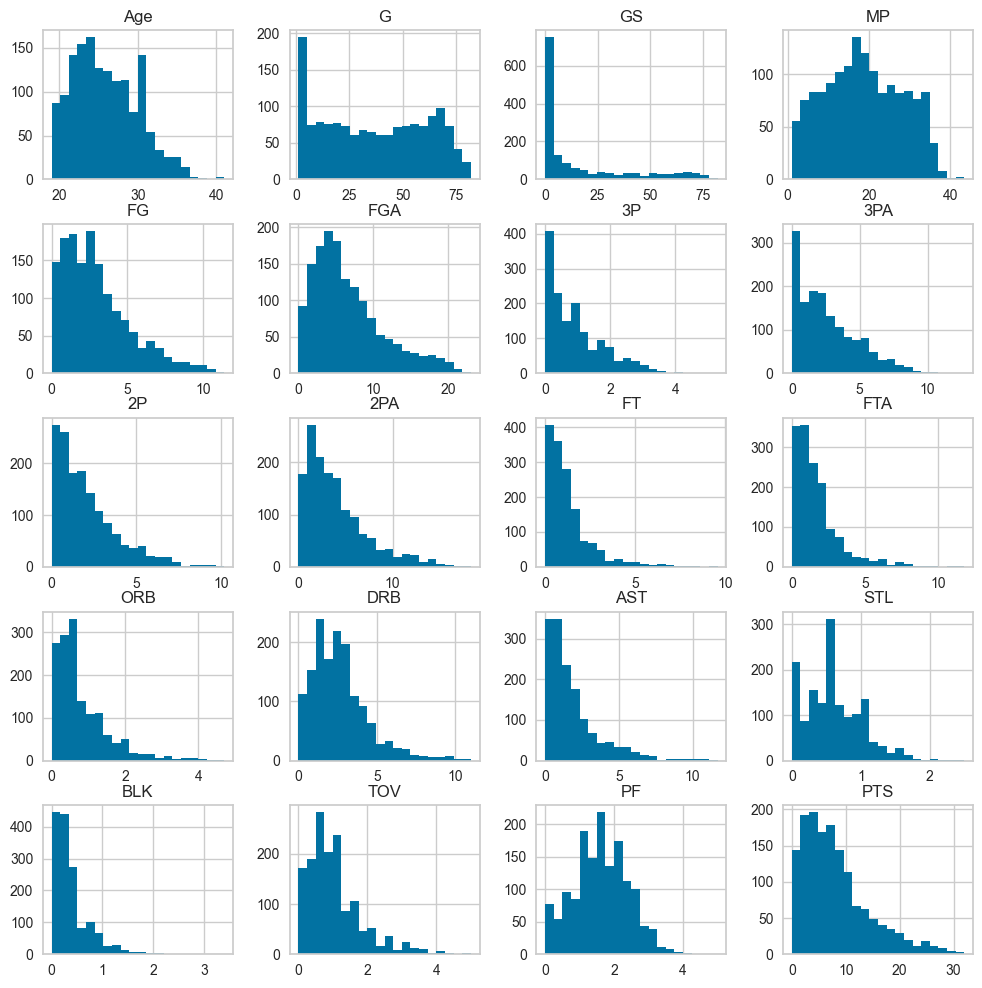

In [313]:
stats_data.loc[:,:].hist(bins=20, figsize=(12,12));

Podemos ver que algunas variables como la edad, los minutos por partido, los intentos de tiro o las faltas personales siguen una distribución parecida a la normal. El resto parece tener una acumulación de jugadores en los rangos bajos.  

Una de las posibles interpretaciones que le podríamos dar es que los jugadores de baloncesto no balancean sus estadísticas, es decir, se centran en una o dos características compatibles con su rol. Es razonable pensar que un base no conseguirá tantos rebotes como un pívot, ni este conseguirá tantos tiros de 3 como el base.

#### Matriz de correlación de las variables



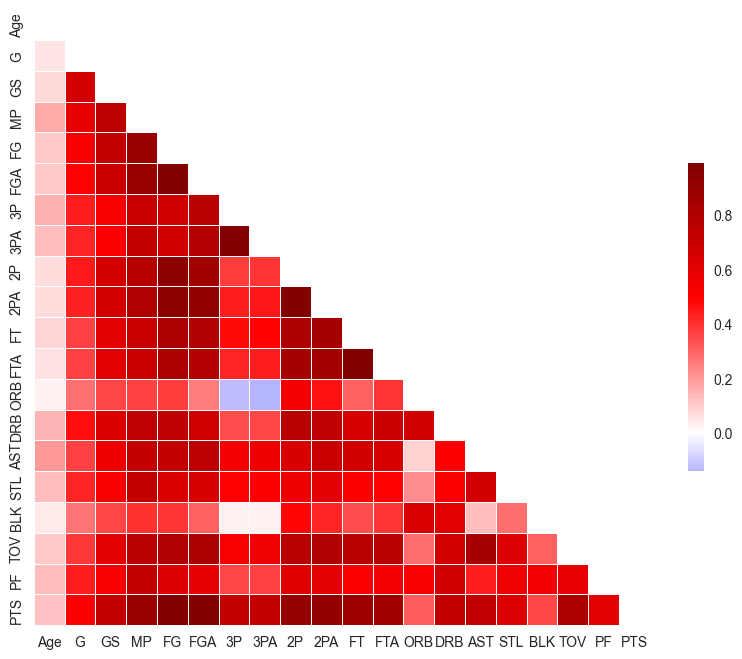

In [314]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

corr = stats_data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.subplots(figsize=(10, 8))
sns.heatmap(corr, mask=mask, cmap='seismic',  center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5});

En la matriz de correlación podemos ver que casi todos los atributos están relacionados de forma positiva, lo cual tiene sentido, ya que si un jugador juega más partidos, tiene más ocasiones de tirar, de hacer asistencias o de coger rebotes; por tanto a mayor número de partidos mejores estadísticas.

Cabe destacar que la edad de un jugador no parece tener un impacto enorme en sus estadísticas, aunque la relación ligeramente positiva nos indica que los jugadores con más experiencia suelen hacerlo un poco mejor.

Además podemos ver una correlación negativa entre los tiros de 3 puntos y los bloqueos y rebotes ofensivos, ya que estos suelen hacerlo los jugadores que juegan debajo del aro. También parece estos suelen hacer menos asistencias, ya que BLK/ORB tiene una correlación débil con AST.

In [315]:
X_orig = stats_data.loc[:,stats_data.columns!='Pos']
y_orig = stats_data.loc[:,'Pos']

#### PCA

Vamos a intentar ver si nuestros datos tienen buena separabilidad usando una PCA

In [316]:
X_train, X_test, y_train, y_test = train_test_split(X_orig, y_orig, test_size=0.3, random_state=42)
nba_std = X_train
nba_std[:] = StandardScaler().fit_transform(nba_std)
myPCA = PCA().fit(nba_std);
nba_std


,Age,G,GS,MP,FG,FGA,3P,3PA,2P,2PA,FT,FTA,ORB,DRB,AST,STL,BLK,TOV,PF,PTS
13559,0.475,-1.385,-0.562,0.959,0.434,0.868,0.106,0.762,0.496,0.740,1.305,1.763,-0.004,0.090,0.858,3.006,0.311,2.968,2.177,0.605
13601,0.231,-0.422,0.448,1.664,1.225,1.331,1.287,1.266,0.939,1.072,1.682,1.454,0.134,-0.132,0.006,1.762,0.053,0.675,0.901,1.399
13273,0.475,-0.883,-0.299,1.140,0.785,0.868,2.232,1.494,-0.002,0.227,-0.503,-0.460,-0.694,0.201,0.645,1.762,0.570,0.192,1.284,0.764
13963,-1.236,0.457,0.272,0.190,-0.312,-0.227,0.106,0.076,-0.445,-0.407,-0.729,-0.769,0.134,0.034,-0.687,0.019,0.311,-0.170,0.263,-0.365
13918,1.208,0.331,1.238,1.707,1.181,1.057,1.523,1.357,0.773,0.650,0.100,-0.028,-0.556,0.201,1.124,0.517,-0.464,1.037,0.773,1.081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14204,0.231,-0.129,-0.694,-1.284,-0.927,-0.963,-0.839,-0.747,-0.833,-0.890,-0.654,-0.707,-0.832,-0.966,-0.846,-0.976,-0.723,-0.894,-1.524,-0.921
14368,0.475,0.331,1.063,1.450,1.400,1.415,1.760,1.357,0.939,1.133,2.209,2.195,-0.556,0.090,0.112,0.766,0.311,0.554,1.029,1.717
13934,0.475,0.289,1.194,1.215,0.522,0.952,0.815,1.128,0.274,0.589,1.004,1.022,-0.004,0.701,2.083,0.019,-0.464,0.796,1.029,0.700
14533,0.231,-1.176,-0.606,-0.163,-0.751,-0.584,-0.248,0.122,-0.777,-0.920,-0.880,-0.892,-0.694,0.034,-0.527,-0.728,-0.206,-0.773,-0.631,-0.762


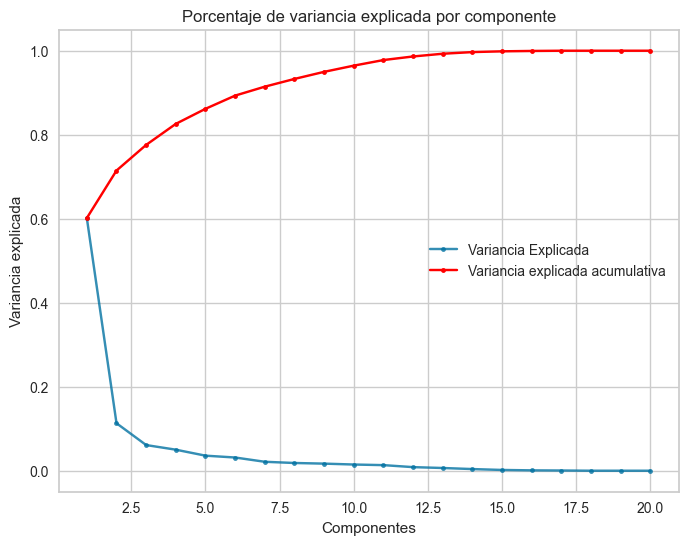

In [317]:
fig = plt.figure(figsize=(8,6));
plt.plot(range(1,len(myPCA.explained_variance_ratio_ )+1),myPCA.explained_variance_ratio_ ,alpha=0.8,marker='.',label="Variancia Explicada");
y_label = plt.ylabel('Variancia explicada');
x_label = plt.xlabel('Componentes');
plt.plot(range(1,len(myPCA.explained_variance_ratio_ )+1),
         np.cumsum(myPCA.explained_variance_ratio_),
         c='red',marker='.',
         label="Variancia explicada acumulativa");
plt.legend();
plt.title('Porcentaje de variancia explicada por componente');

Tenemos el ~70% de la varianza en 2 componentes

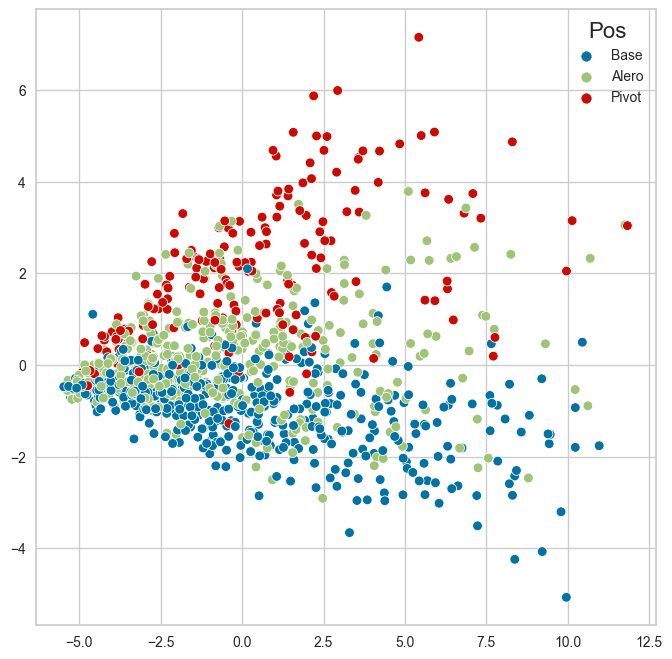

In [318]:
nba_pca = myPCA.transform(nba_std)
plt.figure(figsize=(8,8));
sns.scatterplot(x=nba_pca[:,0], y=nba_pca[:,1], hue=y_train);

Se puede apreciar cierta separabilidad entre algunas de las clases, por ejemplo entre C y PG/SG/SF. Parece que nos va a costar distinguir entre PG/SG/SF y también, aunque un poco menos, entre C y PF.

### División entrenamiento-prueba

Procedemos a hacer la partición de datos en conjunto de entrenamiento y conjunto de prueba.

In [319]:
X_orig = stats_data.loc[:,stats_data.columns!='Pos']
y_orig = stats_data.loc[:,'Pos']

X_train, X_test, y_train, y_test = train_test_split(X_orig, y_orig, test_size=0.3, random_state=42)

#### Normalizamos los datos

In [320]:
scaler = MinMaxScaler();
X_train = scaler.fit_transform(X_train);
X_test = scaler.transform(X_test);

###  Prueba de clasificadores no lineales

#### MLP

In [321]:
mlp = MLPClassifier();
print('non fitted cross_val of mlp: ' + str(np.mean(cross_val_score(mlp,X_train,y_train,cv=10))));

non fitted cross_val of mlp: 0.7464468864468865


In [322]:
param = {'hidden_layer_sizes':[10, 50, 100, 200, 300,500], 
'activation':['relu', 'identity', 'logistic'], 
'alpha':[0.0001, 0.001, 0.01,0.1],
'momentum': [0.95, 0.90, 0.85, 0.8,0.7], 
'learning_rate_init': [0.001, 0.01, 0.1],
'n_iter_no_change':[10, 20, 40, 50], 
'learning_rate': ['constant', 'invscaling', 'adaptive']}

mlp =  MLPClassifier(max_iter=10000,early_stopping=True,random_state=0)
mlp_bs =  BayesSearchCV(mlp,param,
                        n_iter=15, 
                        cv=5, n_jobs=-1, 
                        refit=True,random_state=0)
mlp_bs.fit(X_train, y_train);


In [323]:
show_html(pd.DataFrame(mlp_bs.cv_results_).loc[:,['params', 'mean_test_score','rank_test_score']].sort_values(by='rank_test_score').head().to_html())

,params,mean_test_score,rank_test_score
12,"{'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': 500, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'momentum': 0.9, 'n_iter_no_change': 50}",0.744,1
11,"{'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': 200, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'momentum': 0.7, 'n_iter_no_change': 50}",0.742,2
10,"{'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': 100, 'learning_rate': 'adaptive', 'learning_rate_init': 0.1, 'momentum': 0.95, 'n_iter_no_change': 50}",0.738,3
5,"{'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': 300, 'learning_rate': 'constant', 'learning_rate_init': 0.01, 'momentum': 0.8, 'n_iter_no_change': 50}",0.733,4
3,"{'activation': 'identity', 'alpha': 0.01, 'hidden_layer_sizes': 100, 'learning_rate': 'constant', 'learning_rate_init': 0.1, 'momentum': 0.9, 'n_iter_no_change': 50}",0.733,5


In [324]:
mlp_fit = mlp_bs.best_estimator_
mlp_fit.fit(X_train,y_train);
print('fitted cross_val of mlp_fit: ' + str(np.mean(cross_val_score(mlp_fit,X_train,y_train,cv=10))))


fitted cross_val of mlp_fit: 0.7378663003663004


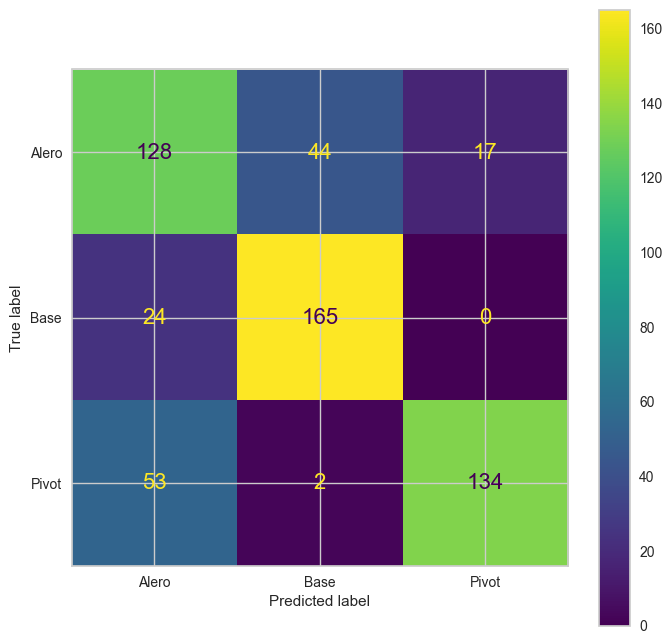

In [331]:
plt.figure(figsize=(8,8));
smt = SMOTE(random_state=0)
X_smote, y_smote = smt.fit_resample(X_test, y_test)
ConfusionMatrixDisplay.from_estimator(mlp_fit, X_smote,y_smote, ax=plt.subplot());

In [332]:
print(classification_report(mlp_fit.predict(X_smote), y_smote))

              precision    recall  f1-score   support

       Alero       0.68      0.62      0.65       205
        Base       0.87      0.78      0.82       211
       Pivot       0.71      0.89      0.79       151

    accuracy                           0.75       567
   macro avg       0.75      0.76      0.75       567
weighted avg       0.76      0.75      0.75       567



Vemos que la clase con la que tenemos más seguridad es la de Base

In [327]:
# param = {'hidden_layer_sizes':[10, 50, 100, 200, 300,500], 
# 'activation':['relu', 'identity', 'logistic'], 
# 'alpha':[0.0001, 0.001, 0.01,0.1],
# 'momentum': [0.95, 0.90, 0.85, 0.8,0.7], 
# 'learning_rate_init': [0.001, 0.01, 0.1],
# 'n_iter_no_change':[10, 20, 40, 50], 
# 'learning_rate': ['constant', 'invscaling', 'adaptive']}

# mlp =  MLPClassifier(max_iter=10000,early_stopping=True,random_state=0)
# smt = SMOTE(random_state=0)
# X_train, y_train = smt.fit_resample(X_train, y_train)
# mlp_bs =  BayesSearchCV(mlp,param,
#                         n_iter=15, 
#                         cv=5, n_jobs=-1, 
#                         refit=True,random_state=0)
# mlp_bs.fit(X_train, y_train);


In [328]:
# y_train.value_counts()

In [329]:
# show_html(pd.DataFrame(mlp_bs.cv_results_).loc[:,['params', 'mean_test_score','rank_test_score']].sort_values(by='rank_test_score').head().to_html())
# mlp_fit = mlp_bs.best_estimator_
# mlp_fit.fit(X_train,y_train);
# print('fitted cross_val of mlp_fit: ' + str(np.mean(cross_val_score(mlp_fit,X_train,y_train,cv=10))))

# plt.figure(figsize=(8,8));
# ConfusionMatrixDisplay.from_estimator(mlp_fit, X_test,y_test, ax=plt.subplot());

In [330]:
# print(classification_report(mlp_fit.predict(X_test), y_test))